# Argo Box Slides

This notebook will make a few combined plots for the Argo slides presentation, all the individual notebooks for boxes in this analysis are named argo_box#. In particular, the areas compared here will be:
- box 1: ACC, low EKE
- box 2: ACC, high EKE
- box 3: Mediterranean outflow

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf

In [2]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)

<module 'MLD_funcs' from '/home.ufs/amf2288/argo-intern/MLD_funcs.py'>

In [6]:
box1 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-40,-30)_ds_z.nc')
box2 = xr.open_dataset('202206_boxes/lon:(-55,-45)_lat:(-45,-35)_ds_z.nc')
box3 = xr.open_dataset('202206_boxes/lon:(-40,-30)_lat:(20,30)_ds_z.nc')

In [7]:
box1 = mf.get_MLD(box1)
box1 = mf.add_times(box1)

box2 = mf.get_MLD(box2)
box2 = mf.add_times(box2)

box3 = mf.get_MLD(box3)
box3 = mf.add_times(box3)

## Plot Spectra

In [8]:
SIG0_spec1  = xrft.power_spectrum(box1.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec1 = xrft.power_spectrum(box1.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_spec2  = xrft.power_spectrum(box2.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec2 = xrft.power_spectrum(box2.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_spec3  = xrft.power_spectrum(box3.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec3 = xrft.power_spectrum(box3.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_m  = SIG0_spec1.freq_PRES_INTERPOLATED
SPICE_m = SPICE_spec1.freq_PRES_INTERPOLATED

Text(0.5, 1.0, 'Spice Spectra')

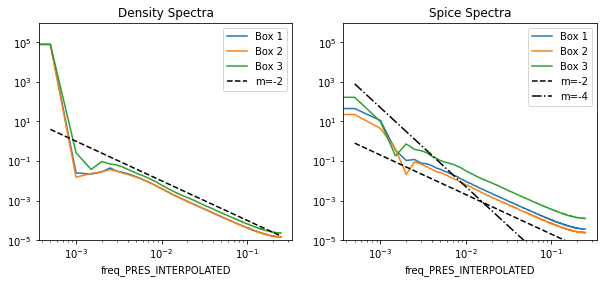

In [54]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
SIG0_spec1.plot(label='Box 1')
SIG0_spec2.plot(label='Box 2')
SIG0_spec3.plot(label='Box 3')
plt.plot(SIG0_m, 1e-6*SIG0_m**-2,'--',color='k',label='m=-2')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Density Spectra')


plt.subplot(1,2,2)
SPICE_spec1.plot(label='Box 1')
SPICE_spec2.plot(label='Box 2')
SPICE_spec3.plot(label='Box 3')
plt.plot(SPICE_m, 2e-7*SPICE_m**(-2),'--',color='k',label='m=-2')
plt.plot(SPICE_m, 5e-11*SPICE_m**(-4),'-.', color='k',label='m=-4')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Spice Spectra')

## Plot Ratios

In [34]:
l1 =  50
l2 = 100
l3 = 200

In [35]:
mke1_d1 = ef.get_MV(box1,l1,variable='SIG0')
mke2_d1 = ef.get_MV(box1,l2,variable='SIG0')
mke3_d1 = ef.get_MV(box1,l3,variable='SIG0')

eke1_d1 = ef.get_EV(box1,l1,variable='SIG0')
eke2_d1 = ef.get_EV(box1,l2,variable='SIG0')
eke3_d1 = ef.get_EV(box1,l3,variable='SIG0')

mke1_s1 = ef.get_MV(box1,l1,variable='SPICE')
mke2_s1 = ef.get_MV(box1,l2,variable='SPICE')
mke3_s1 = ef.get_MV(box1,l3,variable='SPICE')

eke1_s1 = ef.get_EV(box1,l1,variable='SPICE')
eke2_s1 = ef.get_EV(box1,l2,variable='SPICE')
eke3_s1 = ef.get_EV(box1,l3,variable='SPICE')

In [36]:
mke1_d2 = ef.get_MV(box2,l1,variable='SIG0')
mke2_d2 = ef.get_MV(box2,l2,variable='SIG0')
mke3_d2 = ef.get_MV(box2,l3,variable='SIG0')

eke1_d2 = ef.get_EV(box2,l1,variable='SIG0')
eke2_d2 = ef.get_EV(box2,l2,variable='SIG0')
eke3_d2 = ef.get_EV(box2,l3,variable='SIG0')

mke1_s2 = ef.get_MV(box2,l1,variable='SPICE')
mke2_s2 = ef.get_MV(box2,l2,variable='SPICE')
mke3_s2 = ef.get_MV(box2,l3,variable='SPICE')

eke1_s2 = ef.get_EV(box2,l1,variable='SPICE')
eke2_s2 = ef.get_EV(box2,l2,variable='SPICE')
eke3_s2 = ef.get_EV(box2,l3,variable='SPICE')

In [37]:
mke1_d3 = ef.get_MV(box3,l1,variable='SIG0')
mke2_d3 = ef.get_MV(box3,l2,variable='SIG0')
mke3_d3 = ef.get_MV(box3,l3,variable='SIG0')

eke1_d3 = ef.get_EV(box3,l1,variable='SIG0')
eke2_d3 = ef.get_EV(box3,l2,variable='SIG0')
eke3_d3 = ef.get_EV(box3,l3,variable='SIG0')

mke1_s3 = ef.get_MV(box3,l1,variable='SPICE')
mke2_s3 = ef.get_MV(box3,l2,variable='SPICE')
mke3_s3 = ef.get_MV(box3,l3,variable='SPICE')

eke1_s3 = ef.get_EV(box3,l1,variable='SPICE')
eke2_s3 = ef.get_EV(box3,l2,variable='SPICE')
eke3_s3 = ef.get_EV(box3,l3,variable='SPICE')

In [38]:
MKE0_d1 = eke1_d1.where(eke3_d1.mask==1)
MKE1_d1 = mke1_d1.where(mke3_d1.mask==1) - mke2_d1.where(mke3_d1.mask==1)
MKE2_d1 = mke2_d1.where(mke3_d1.mask==1) - mke3_d1.where(mke3_d1.mask==1)
MKE3_d1 = mke3_d1.where(mke3_d1.mask==1)

EKE0_d1 = eke1_d1.where(eke3_d1.mask==1)
EKE1_d1 = eke2_d1.where(eke3_d1.mask==1) - eke1_d1.where(eke3_d1.mask==1)
EKE2_d1 = eke3_d1.where(eke3_d1.mask==1) - eke2_d1.where(eke3_d1.mask==1)
EKE3_d1 = mke3_d1.where(mke3_d1.mask==1)

MKE0_s1 = eke1_s1.where(eke3_d1.mask==1)
MKE1_s1 = mke1_s1.where(mke3_d1.mask==1) - mke2_s1.where(mke3_d1.mask==1)
MKE2_s1 = mke2_s1.where(mke3_d1.mask==1) - mke3_s1.where(mke3_d1.mask==1)
MKE3_s1 = mke3_s1.where(mke3_d1.mask==1)

EKE0_s1 = eke1_s1.where(eke3_d1.mask==1)
EKE1_s1 = eke2_s1.where(eke3_d1.mask==1) - eke1_s1.where(eke3_d1.mask==1)
EKE2_s1 = eke3_s1.where(eke3_d1.mask==1) - eke2_s1.where(eke3_d1.mask==1)
EKE3_s1 = mke3_s1.where(mke3_d1.mask==1)

In [39]:
MKE0_d2 = eke1_d2.where(eke3_d2.mask==1)
MKE1_d2 = mke1_d2.where(mke3_d2.mask==1) - mke2_d2.where(mke3_d2.mask==1)
MKE2_d2 = mke2_d2.where(mke3_d2.mask==1) - mke3_d2.where(mke3_d2.mask==1)
MKE3_d2 = mke3_d2.where(mke3_d2.mask==1)

EKE0_d2 = eke1_d2.where(eke3_d2.mask==1)
EKE1_d2 = eke2_d2.where(eke3_d2.mask==1) - eke1_d2.where(eke3_d2.mask==1)
EKE2_d2 = eke3_d2.where(eke3_d2.mask==1) - eke2_d2.where(eke3_d2.mask==1)
EKE3_d2 = mke3_d2.where(mke3_d2.mask==1)

MKE0_s2 = eke1_s2.where(eke3_d2.mask==1)
MKE1_s2 = mke1_s2.where(mke3_d2.mask==1) - mke2_s2.where(mke3_d2.mask==1)
MKE2_s2 = mke2_s2.where(mke3_d2.mask==1) - mke3_s2.where(mke3_d2.mask==1)
MKE3_s2 = mke3_s2.where(mke3_d2.mask==1)

EKE0_s2 = eke1_s2.where(eke3_d2.mask==1)
EKE1_s2 = eke2_s2.where(eke3_d2.mask==1) - eke1_s2.where(eke3_d2.mask==1)
EKE2_s2 = eke3_s2.where(eke3_d2.mask==1) - eke2_s2.where(eke3_d2.mask==1)
EKE3_s2 = mke3_s2.where(mke3_d2.mask==1)

In [40]:
MKE0_d3 = eke1_d3.where(eke3_d1.mask==1)
MKE1_d3 = mke1_d3.where(mke3_d1.mask==1) - mke2_d3.where(mke3_d3.mask==1)
MKE2_d3 = mke2_d3.where(mke3_d1.mask==1) - mke3_d3.where(mke3_d3.mask==1)
MKE3_d3 = mke3_d3.where(mke3_d1.mask==1)

EKE0_d3 = eke1_d3.where(eke3_d1.mask==1)
EKE1_d3 = eke2_d3.where(eke3_d1.mask==1) - eke1_d3.where(eke3_d3.mask==1)
EKE2_d3 = eke3_d3.where(eke3_d1.mask==1) - eke2_d3.where(eke3_d3.mask==1)
EKE3_d3 = mke3_d3.where(mke3_d1.mask==1)

MKE0_s3 = eke1_s3.where(eke3_d1.mask==1)
MKE1_s3 = mke1_s3.where(mke3_d1.mask==1) - mke2_s3.where(mke3_d3.mask==1)
MKE2_s3 = mke2_s3.where(mke3_d1.mask==1) - mke3_s3.where(mke3_d3.mask==1)
MKE3_s3 = mke3_s3.where(mke3_d1.mask==1)

EKE0_s3 = eke1_s3.where(eke3_d1.mask==1)
EKE1_s3 = eke2_s3.where(eke3_d1.mask==1) - eke1_s3.where(eke3_d3.mask==1)
EKE2_s3 = eke3_s3.where(eke3_d1.mask==1) - eke2_s3.where(eke3_d3.mask==1)
EKE3_s3 = mke3_s3.where(mke3_d1.mask==1)

In [55]:
R_ex_d1 = EKE0_d1.mean('N_PROF') / MKE3_d1.mean('N_PROF')
R_ex_s1 = EKE0_s1.mean('N_PROF') / MKE3_s1.mean('N_PROF')

R_ex_d2 = EKE0_d2.mean('N_PROF') / MKE3_d2.mean('N_PROF')
R_ex_s2 = EKE0_s2.mean('N_PROF') / MKE3_s2.mean('N_PROF')

R_ex_d3 = EKE0_d3.mean('N_PROF') / MKE3_d3.mean('N_PROF')
R_ex_s3 = EKE0_s3.mean('N_PROF') / MKE3_s3.mean('N_PROF')

In [56]:
R_l1_d1 = eke1_d1.where(eke3_d1.mask==1).mean('N_PROF') / mke1_d1.where(eke3_d1.mask==1).mean('N_PROF')
R_l2_d1 = eke2_d1.where(eke3_d1.mask==1).mean('N_PROF') / mke2_d1.where(eke3_d1.mask==1).mean('N_PROF')
R_l3_d1 = eke3_d1.where(eke3_d1.mask==1).mean('N_PROF') / mke3_d1.where(eke3_d1.mask==1).mean('N_PROF')
R_l1_s1 = eke1_s1.where(eke3_d1.mask==1).mean('N_PROF') / mke1_s1.where(eke3_s1.mask==1).mean('N_PROF')
R_l2_s1 = eke2_s1.where(eke3_d1.mask==1).mean('N_PROF') / mke2_s1.where(eke3_s1.mask==1).mean('N_PROF')
R_l3_s1 = eke3_s1.where(eke3_d1.mask==1).mean('N_PROF') / mke3_s1.where(eke3_s1.mask==1).mean('N_PROF')

R_l1_d2 = eke1_d2.where(eke3_d2.mask==1).mean('N_PROF') / mke1_d2.where(eke3_d2.mask==1).mean('N_PROF')
R_l2_d2 = eke2_d2.where(eke3_d2.mask==1).mean('N_PROF') / mke2_d2.where(eke3_d2.mask==1).mean('N_PROF')
R_l3_d2 = eke3_d2.where(eke3_d2.mask==1).mean('N_PROF') / mke3_d2.where(eke3_d2.mask==1).mean('N_PROF')
R_l1_s2 = eke1_s2.where(eke3_d2.mask==1).mean('N_PROF') / mke1_s2.where(eke3_s2.mask==1).mean('N_PROF')
R_l2_s2 = eke2_s2.where(eke3_d2.mask==1).mean('N_PROF') / mke2_s2.where(eke3_s2.mask==1).mean('N_PROF')
R_l3_s2 = eke3_s2.where(eke3_d2.mask==1).mean('N_PROF') / mke3_s2.where(eke3_s2.mask==1).mean('N_PROF')

R_l1_d3 = eke1_d3.where(eke3_d3.mask==1).mean('N_PROF') / mke1_d3.where(eke3_d3.mask==1).mean('N_PROF')
R_l2_d3 = eke2_d3.where(eke3_d3.mask==1).mean('N_PROF') / mke2_d3.where(eke3_d3.mask==1).mean('N_PROF')
R_l3_d3 = eke3_d3.where(eke3_d3.mask==1).mean('N_PROF') / mke3_d3.where(eke3_d3.mask==1).mean('N_PROF')
R_l1_s3 = eke1_s3.where(eke3_d3.mask==1).mean('N_PROF') / mke1_s3.where(eke3_s3.mask==1).mean('N_PROF')
R_l2_s3 = eke2_s3.where(eke3_d3.mask==1).mean('N_PROF') / mke2_s3.where(eke3_s3.mask==1).mean('N_PROF')
R_l3_s3 = eke3_s3.where(eke3_d3.mask==1).mean('N_PROF') / mke3_s3.where(eke3_s3.mask==1).mean('N_PROF')

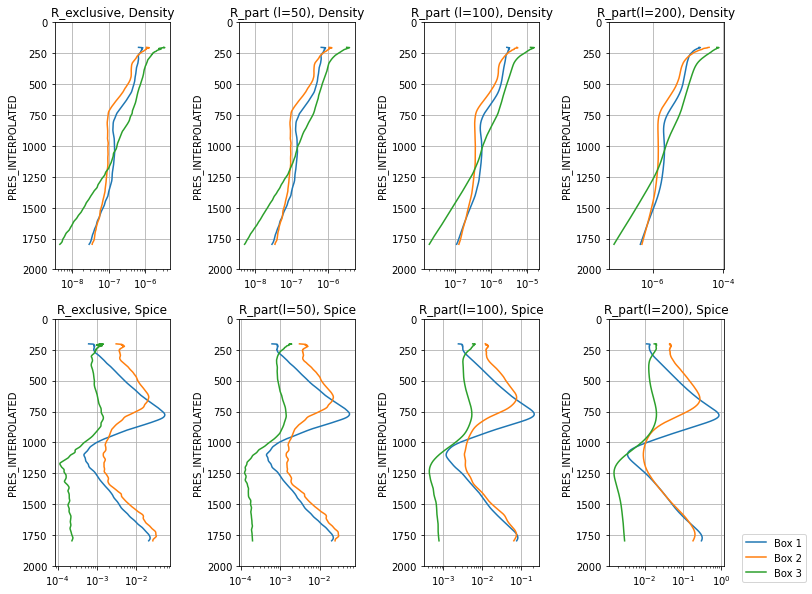

In [57]:
plt.figure(figsize=(12,10))

plt.subplot(2,4,1)
R_ex_d1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_ex_d2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_ex_d3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_exclusive, Density')

plt.subplot(2,4,2)
R_l1_d1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l1_d2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l1_d3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_part (l={}), Density'.format(l1))

plt.subplot(2,4,3)
R_l2_d1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l2_d2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l2_d3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_part (l={}), Density'.format(l2))

plt.subplot(2,4,4)
R_l3_d1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l3_d2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l3_d3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_part(l={}), Density'.format(l3))

plt.subplot(2,4,5)
R_ex_s1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_ex_s2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_ex_s3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_exclusive, Spice')

plt.subplot(2,4,6)
R_l1_s1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l1_s2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l1_s3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_part(l={}), Spice'.format(l1))

plt.subplot(2,4,7)
R_l2_s1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l2_s2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l2_s3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_part(l={}), Spice'.format(l2))

plt.subplot(2,4,8)
R_l3_s1.plot(y='PRES_INTERPOLATED',label='Box 1')
R_l3_s2.plot(y='PRES_INTERPOLATED',label='Box 2')
R_l3_s3.plot(y='PRES_INTERPOLATED',label='Box 3')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.75,0.15))
plt.title('R_part(l={}), Spice'.format(l3))

plt.subplots_adjust(wspace=0.6)

# Southern Ocean Section

In [59]:
box1 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-20,-10)_ds_z.nc')
box2 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-30,-20)_ds_z.nc')
box3 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-40,-30)_ds_z.nc')
box4 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-50,-40)_ds_z.nc')
box5 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-60,-50)_ds_z.nc')
box6 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-70,-60)_ds_z.nc')

In [94]:
box1_dim = [-10,0,-20,-10]
box2_dim = [-10,0,-30,-20]
box3_dim = [-10,0,-40,-30]
box4_dim = [-10,0,-50,-40]
box5_dim = [-10,0,-60,-50]
box6_dim = [-10,0,-70,-60]
box_dims = [box1_dim,box2_dim,box3_dim,box4_dim,box5_dim,box6_dim]

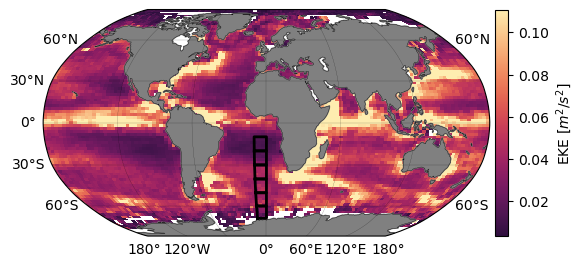

In [95]:
pf.plot_box(box_dims)

The boxes are in series, where box 1 is the farthest north and box 6 is the farthest south

In [63]:
box1 = mf.get_MLD(box1)
box1 = mf.add_times(box1)
box2 = mf.get_MLD(box2)
box2 = mf.add_times(box2)
box3 = mf.get_MLD(box3)
box3 = mf.add_times(box3)
box4 = mf.get_MLD(box4)
box4 = mf.add_times(box4)
box5 = mf.get_MLD(box5)
box5 = mf.add_times(box5)
box6 = mf.get_MLD(box6)
box6 = mf.add_times(box6)

In [64]:
mke1_d1 = ef.get_MV(box1,l1,variable='SIG0')
mke2_d1 = ef.get_MV(box1,l2,variable='SIG0')
mke3_d1 = ef.get_MV(box1,l3,variable='SIG0')

eke1_d1 = ef.get_EV(box1,l1,variable='SIG0')
eke2_d1 = ef.get_EV(box1,l2,variable='SIG0')
eke3_d1 = ef.get_EV(box1,l3,variable='SIG0')

mke1_s1 = ef.get_MV(box1,l1,variable='SPICE')
mke2_s1 = ef.get_MV(box1,l2,variable='SPICE')
mke3_s1 = ef.get_MV(box1,l3,variable='SPICE')

eke1_s1 = ef.get_EV(box1,l1,variable='SPICE')
eke2_s1 = ef.get_EV(box1,l2,variable='SPICE')
eke3_s1 = ef.get_EV(box1,l3,variable='SPICE')

In [65]:
mke1_d2 = ef.get_MV(box2,l1,variable='SIG0')
mke2_d2 = ef.get_MV(box2,l2,variable='SIG0')
mke3_d2 = ef.get_MV(box2,l3,variable='SIG0')

eke1_d2 = ef.get_EV(box2,l1,variable='SIG0')
eke2_d2 = ef.get_EV(box2,l2,variable='SIG0')
eke3_d2 = ef.get_EV(box2,l3,variable='SIG0')

mke1_s2 = ef.get_MV(box2,l1,variable='SPICE')
mke2_s2 = ef.get_MV(box2,l2,variable='SPICE')
mke3_s2 = ef.get_MV(box2,l3,variable='SPICE')

eke1_s2 = ef.get_EV(box2,l1,variable='SPICE')
eke2_s2 = ef.get_EV(box2,l2,variable='SPICE')
eke3_s2 = ef.get_EV(box2,l3,variable='SPICE')

In [66]:
mke1_d3 = ef.get_MV(box3,l1,variable='SIG0')
mke2_d3 = ef.get_MV(box3,l2,variable='SIG0')
mke3_d3 = ef.get_MV(box3,l3,variable='SIG0')

eke1_d3 = ef.get_EV(box3,l1,variable='SIG0')
eke2_d3 = ef.get_EV(box3,l2,variable='SIG0')
eke3_d3 = ef.get_EV(box3,l3,variable='SIG0')

mke1_s3 = ef.get_MV(box3,l1,variable='SPICE')
mke2_s3 = ef.get_MV(box3,l2,variable='SPICE')
mke3_s3 = ef.get_MV(box3,l3,variable='SPICE')

eke1_s3 = ef.get_EV(box3,l1,variable='SPICE')
eke2_s3 = ef.get_EV(box3,l2,variable='SPICE')
eke3_s3 = ef.get_EV(box3,l3,variable='SPICE')

In [67]:
mke1_d4 = ef.get_MV(box4,l1,variable='SIG0')
mke2_d4 = ef.get_MV(box4,l2,variable='SIG0')
mke3_d4 = ef.get_MV(box4,l3,variable='SIG0')

eke1_d4 = ef.get_EV(box4,l1,variable='SIG0')
eke2_d4 = ef.get_EV(box4,l2,variable='SIG0')
eke3_d4 = ef.get_EV(box4,l3,variable='SIG0')

mke1_s4 = ef.get_MV(box4,l1,variable='SPICE')
mke2_s4 = ef.get_MV(box4,l2,variable='SPICE')
mke3_s4 = ef.get_MV(box4,l3,variable='SPICE')

eke1_s4 = ef.get_EV(box4,l1,variable='SPICE')
eke2_s4 = ef.get_EV(box4,l2,variable='SPICE')
eke3_s4 = ef.get_EV(box4,l3,variable='SPICE')

In [68]:
mke1_d5 = ef.get_MV(box5,l1,variable='SIG0')
mke2_d5 = ef.get_MV(box5,l2,variable='SIG0')
mke3_d5 = ef.get_MV(box5,l3,variable='SIG0')

eke1_d5 = ef.get_EV(box5,l1,variable='SIG0')
eke2_d5 = ef.get_EV(box5,l2,variable='SIG0')
eke3_d5 = ef.get_EV(box5,l3,variable='SIG0')

mke1_s5 = ef.get_MV(box5,l1,variable='SPICE')
mke2_s5 = ef.get_MV(box5,l2,variable='SPICE')
mke3_s5 = ef.get_MV(box5,l3,variable='SPICE')

eke1_s5 = ef.get_EV(box5,l1,variable='SPICE')
eke2_s5 = ef.get_EV(box5,l2,variable='SPICE')
eke3_s5 = ef.get_EV(box5,l3,variable='SPICE')

In [69]:
mke1_d6 = ef.get_MV(box6,l1,variable='SIG0')
mke2_d6 = ef.get_MV(box6,l2,variable='SIG0')
mke3_d6 = ef.get_MV(box6,l3,variable='SIG0')

eke1_d6 = ef.get_EV(box6,l1,variable='SIG0')
eke2_d6 = ef.get_EV(box6,l2,variable='SIG0')
eke3_d6 = ef.get_EV(box6,l3,variable='SIG0')

mke1_s6 = ef.get_MV(box6,l1,variable='SPICE')
mke2_s6 = ef.get_MV(box6,l2,variable='SPICE')
mke3_s6 = ef.get_MV(box6,l3,variable='SPICE')

eke1_s6 = ef.get_EV(box6,l1,variable='SPICE')
eke2_s6 = ef.get_EV(box6,l2,variable='SPICE')
eke3_s6 = ef.get_EV(box6,l3,variable='SPICE')

In [70]:
MKE0_d1 = eke1_d1.where(eke3_d1.mask==1)
MKE1_d1 = mke1_d1.where(mke3_d1.mask==1) - mke2_d1.where(mke3_d1.mask==1)
MKE2_d1 = mke2_d1.where(mke3_d1.mask==1) - mke3_d1.where(mke3_d1.mask==1)
MKE3_d1 = mke3_d1.where(mke3_d1.mask==1)

EKE0_d1 = eke1_d1.where(eke3_d1.mask==1)
EKE1_d1 = eke2_d1.where(eke3_d1.mask==1) - eke1_d1.where(eke3_d1.mask==1)
EKE2_d1 = eke3_d1.where(eke3_d1.mask==1) - eke2_d1.where(eke3_d1.mask==1)
EKE3_d1 = mke3_d1.where(mke3_d1.mask==1)

MKE0_s1 = eke1_s1.where(eke3_d1.mask==1)
MKE1_s1 = mke1_s1.where(mke3_d1.mask==1) - mke2_s1.where(mke3_d1.mask==1)
MKE2_s1 = mke2_s1.where(mke3_d1.mask==1) - mke3_s1.where(mke3_d1.mask==1)
MKE3_s1 = mke3_s1.where(mke3_d1.mask==1)

EKE0_s1 = eke1_s1.where(eke3_d1.mask==1)
EKE1_s1 = eke2_s1.where(eke3_d1.mask==1) - eke1_s1.where(eke3_d1.mask==1)
EKE2_s1 = eke3_s1.where(eke3_d1.mask==1) - eke2_s1.where(eke3_d1.mask==1)
EKE3_s1 = mke3_s1.where(mke3_d1.mask==1)

In [71]:
MKE0_d2 = eke1_d2.where(eke3_d2.mask==1)
MKE1_d2 = mke1_d2.where(mke3_d2.mask==1) - mke2_d2.where(mke3_d2.mask==1)
MKE2_d2 = mke2_d2.where(mke3_d2.mask==1) - mke3_d2.where(mke3_d2.mask==1)
MKE3_d2 = mke3_d2.where(mke3_d2.mask==1)

EKE0_d2 = eke1_d2.where(eke3_d2.mask==1)
EKE1_d2 = eke2_d2.where(eke3_d2.mask==1) - eke1_d2.where(eke3_d2.mask==1)
EKE2_d2 = eke3_d2.where(eke3_d2.mask==1) - eke2_d2.where(eke3_d2.mask==1)
EKE3_d2 = mke3_d2.where(mke3_d2.mask==1)

MKE0_s2 = eke1_s2.where(eke3_d2.mask==1)
MKE1_s2 = mke1_s2.where(mke3_d2.mask==1) - mke2_s2.where(mke3_d2.mask==1)
MKE2_s2 = mke2_s2.where(mke3_d2.mask==1) - mke3_s2.where(mke3_d2.mask==1)
MKE3_s2 = mke3_s2.where(mke3_d2.mask==1)

EKE0_s2 = eke1_s2.where(eke3_d2.mask==1)
EKE1_s2 = eke2_s2.where(eke3_d2.mask==1) - eke1_s2.where(eke3_d2.mask==1)
EKE2_s2 = eke3_s2.where(eke3_d2.mask==1) - eke2_s2.where(eke3_d2.mask==1)
EKE3_s2 = mke3_s2.where(mke3_d2.mask==1)

In [72]:
MKE0_d3 = eke1_d3.where(eke3_d3.mask==1)
MKE1_d3 = mke1_d3.where(mke3_d3.mask==1) - mke2_d3.where(mke3_d3.mask==1)
MKE2_d3 = mke2_d3.where(mke3_d3.mask==1) - mke3_d3.where(mke3_d3.mask==1)
MKE3_d3 = mke3_d3.where(mke3_d3.mask==1)

EKE0_d3 = eke1_d3.where(eke3_d3.mask==1)
EKE1_d3 = eke2_d3.where(eke3_d3.mask==1) - eke1_d3.where(eke3_d3.mask==1)
EKE2_d3 = eke3_d3.where(eke3_d3.mask==1) - eke2_d3.where(eke3_d3.mask==1)
EKE3_d3 = mke3_d3.where(mke3_d3.mask==1)

MKE0_s3 = eke1_s3.where(eke3_d3.mask==1)
MKE1_s3 = mke1_s3.where(mke3_d3.mask==1) - mke2_s3.where(mke3_d3.mask==1)
MKE2_s3 = mke2_s3.where(mke3_d3.mask==1) - mke3_s3.where(mke3_d3.mask==1)
MKE3_s3 = mke3_s3.where(mke3_d3.mask==1)

EKE0_s3 = eke1_s3.where(eke3_d3.mask==1)
EKE1_s3 = eke2_s3.where(eke3_d3.mask==1) - eke1_s3.where(eke3_d3.mask==1)
EKE2_s3 = eke3_s3.where(eke3_d3.mask==1) - eke2_s3.where(eke3_d3.mask==1)
EKE3_s3 = mke3_s3.where(mke3_d3.mask==1)

In [74]:
MKE0_d4 = eke1_d4.where(eke3_d4.mask==1)
MKE1_d4 = mke1_d4.where(mke3_d4.mask==1) - mke2_d4.where(mke3_d4.mask==1)
MKE2_d4 = mke2_d4.where(mke3_d4.mask==1) - mke3_d4.where(mke3_d4.mask==1)
MKE3_d4 = mke3_d4.where(mke3_d4.mask==1)

EKE0_d4 = eke1_d4.where(eke3_d4.mask==1)
EKE1_d4 = eke2_d4.where(eke3_d4.mask==1) - eke1_d4.where(eke3_d4.mask==1)
EKE2_d4 = eke3_d4.where(eke3_d4.mask==1) - eke2_d4.where(eke3_d4.mask==1)
EKE3_d4 = mke3_d4.where(mke3_d4.mask==1)

MKE0_s4 = eke1_s4.where(eke3_d4.mask==1)
MKE1_s4 = mke1_s4.where(mke3_d4.mask==1) - mke2_s4.where(mke3_d4.mask==1)
MKE2_s4 = mke2_s4.where(mke3_d4.mask==1) - mke3_s4.where(mke3_d4.mask==1)
MKE3_s4 = mke3_s4.where(mke3_d4.mask==1)

EKE0_s4 = eke1_s4.where(eke3_d4.mask==1)
EKE1_s4 = eke2_s4.where(eke3_d4.mask==1) - eke1_s4.where(eke3_d4.mask==1)
EKE2_s4 = eke3_s4.where(eke3_d4.mask==1) - eke2_s4.where(eke3_d4.mask==1)
EKE3_s4 = mke3_s4.where(mke3_d4.mask==1)

In [75]:
MKE0_d5 = eke1_d5.where(eke3_d5.mask==1)
MKE1_d5 = mke1_d5.where(mke3_d5.mask==1) - mke2_d5.where(mke3_d5.mask==1)
MKE2_d5 = mke2_d5.where(mke3_d5.mask==1) - mke3_d5.where(mke3_d5.mask==1)
MKE3_d5 = mke3_d5.where(mke3_d5.mask==1)

EKE0_d5 = eke1_d5.where(eke3_d5.mask==1)
EKE1_d5 = eke2_d5.where(eke3_d5.mask==1) - eke1_d5.where(eke3_d5.mask==1)
EKE2_d5 = eke3_d5.where(eke3_d5.mask==1) - eke2_d5.where(eke3_d5.mask==1)
EKE3_d5 = mke3_d5.where(mke3_d5.mask==1)

MKE0_s5 = eke1_s5.where(eke3_d5.mask==1)
MKE1_s5 = mke1_s5.where(mke3_d5.mask==1) - mke2_s5.where(mke3_d5.mask==1)
MKE2_s5 = mke2_s5.where(mke3_d5.mask==1) - mke3_s5.where(mke3_d5.mask==1)
MKE3_s5 = mke3_s5.where(mke3_d5.mask==1)

EKE0_s5 = eke1_s5.where(eke3_d5.mask==1)
EKE1_s5 = eke2_s5.where(eke3_d5.mask==1) - eke1_s5.where(eke3_d5.mask==1)
EKE2_s5 = eke3_s5.where(eke3_d5.mask==1) - eke2_s5.where(eke3_d5.mask==1)
EKE3_s5 = mke3_s5.where(mke3_d5.mask==1)

In [76]:
MKE0_d6 = eke1_d6.where(eke3_d6.mask==1)
MKE1_d6 = mke1_d6.where(mke3_d6.mask==1) - mke2_d6.where(mke3_d6.mask==1)
MKE2_d6 = mke2_d6.where(mke3_d6.mask==1) - mke3_d6.where(mke3_d6.mask==1)
MKE3_d6 = mke3_d6.where(mke3_d6.mask==1)

EKE0_d6 = eke1_d6.where(eke3_d6.mask==1)
EKE1_d6 = eke2_d6.where(eke3_d6.mask==1) - eke1_d6.where(eke3_d6.mask==1)
EKE2_d6 = eke3_d6.where(eke3_d6.mask==1) - eke2_d6.where(eke3_d6.mask==1)
EKE3_d6 = mke3_d6.where(mke3_d6.mask==1)

MKE0_s6 = eke1_s6.where(eke3_d6.mask==1)
MKE1_s6 = mke1_s6.where(mke3_d6.mask==1) - mke2_s6.where(mke3_d6.mask==1)
MKE2_s6 = mke2_s6.where(mke3_d6.mask==1) - mke3_s6.where(mke3_d6.mask==1)
MKE3_s6 = mke3_s6.where(mke3_d6.mask==1)

EKE0_s6 = eke1_s6.where(eke3_d6.mask==1)
EKE1_s6 = eke2_s6.where(eke3_d6.mask==1) - eke1_s6.where(eke3_d6.mask==1)
EKE2_s6 = eke3_s6.where(eke3_d6.mask==1) - eke2_s6.where(eke3_d6.mask==1)
EKE3_s6 = mke3_s6.where(mke3_d6.mask==1)

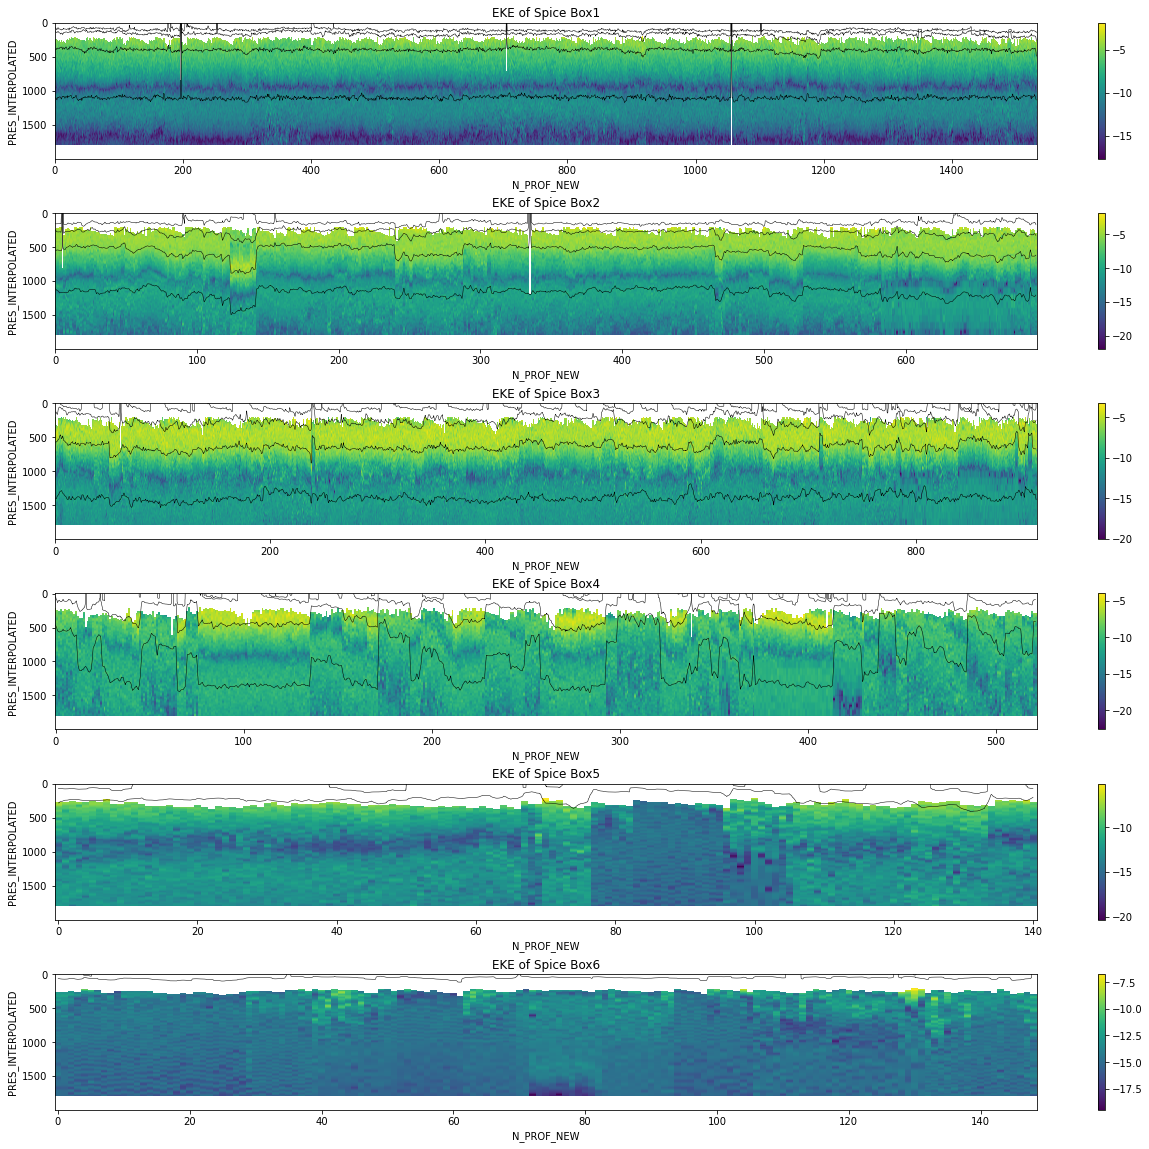

In [96]:
levels = [26,26.5,27,27.5,28,28.5,29]
depths = [100,300,700,1000,1400]

plt.figure(figsize=(22,20))

plt.subplot(611)
np.log(EKE0_s1).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')
box1.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box1')

plt.subplot(612)
np.log(EKE0_s2).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')#,vmin=-20,vmax=0)
box2.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box2')

plt.subplot(613)
np.log(EKE0_s3).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')#,vmin=-18,vmax=2)
box3.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box3')

plt.subplot(614)
np.log(EKE0_s4).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')#, vmin=-15,vmax=5)
box4.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box4')
          
plt.subplot(615)
np.log(EKE0_s5).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')#, vmin=-15,vmax=5)
box5.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box5')
          
plt.subplot(616)
np.log(EKE0_s6).plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')#, vmin=-15,vmax=5)
box6.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
plt.title('EKE of Spice Box6')

plt.subplots_adjust(hspace=0.4)

In [ ]:
'''try sorting this by density at 1000m, hopefully will organize as N-S pattern'''